In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import sys
import os
from pathlib import Path

import psana as ps

In [2]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

In [5]:
exp_name = 'amolu0017'
# exp = 'amolt7017'

run = 98

In [6]:
dstr = 'exp={}:run={}'.format(exp_name, run) # do not take smd to access raw GMD waveforms
print('\n'+dstr+'\n')
# ds = ps.DataSource(dstr)
ds = ps.MPIDataSource(dstr)
ds.detnames()


exp=amolu0017:run=98



[('XrayTransportDiagnostic.0:Opal1000.0', 'xtcav', ''),
 ('AmoEndstation.0:Acqiris.1', 'ACQ1', ''),
 ('NoDetector.0:Evr.0', '', ''),
 ('AmoEndstation.0:Opal1000.3', 'OPAL3', ''),
 ('NoDetector.0:Evr.1', '', ''),
 ('EBeam', '', ''),
 ('PhaseCavity', '', ''),
 ('FEEGasDetEnergy', '', ''),
 ('GMD', '', ''),
 ('AMO-AIN-01', '', ''),
 ('AmoEndstation.0:Opal1000.1', 'OPAL1', ''),
 ('ControlData', '', '')]

In [12]:
for det in ds.detnames('epics'):
    if 'GMD_ACQ_RAW' in det[1]:
        print(det)
    if 'GDWaveform_241' in det[1]:
        print(det)

('DIAG:FEE1:202:241:Data', 'GDWaveform_241', '')


In [14]:
gem241 = ps.Detector('GDWaveform_241')
gem242 = ps.Detector('GDWaveform_242')
gem243 = ps.Detector('GDWaveform_243')
gem244 = ps.Detector('GDWaveform_244')

In [19]:
dat = []
nevt_max = 500
for nevt,evt in enumerate(ds.events()):
    dat.append([])
    dat[nevt].append(-gem241())
    dat[nevt].append(-gem242())
    dat[nevt].append(-gem243())
    dat[nevt].append(-gem244())
    if nevt==nevt_max: break
dat = np.asarray(dat)
print(dat.shape)

(501, 4, 800)


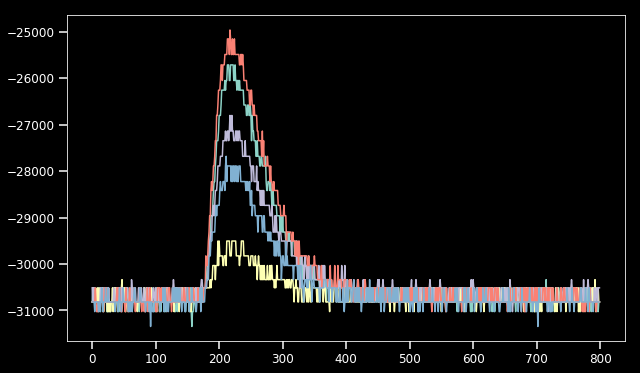

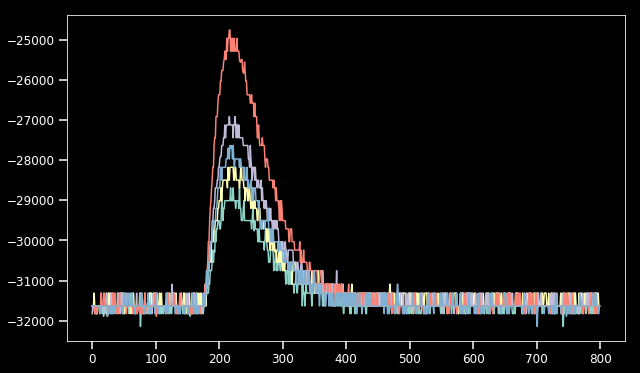

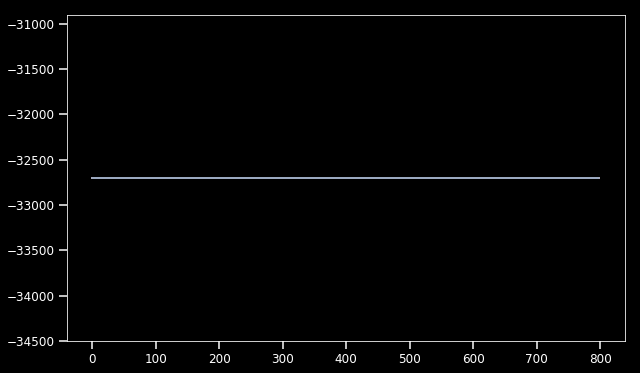

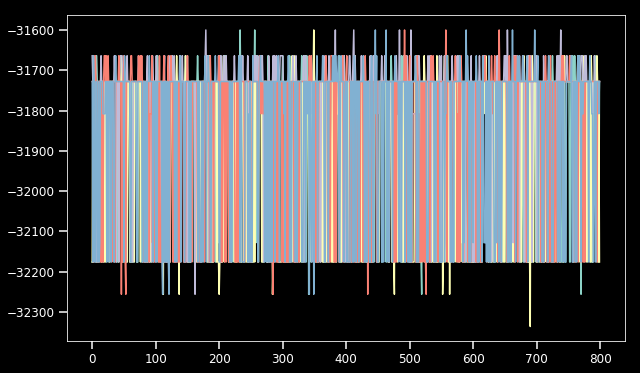

In [26]:
for ii in range(4):
    fig, ax = plt.subplots()
    idx = np.random.randint(501, size=5)
    ax.plot(dat[idx,ii,:].T)